Exercícios sobre distribuições
==============================



## Contextualização



A confirmação da teoria da Relatividade Geral de Albert Einstein durante o eclipse solar de 1919 é um momento marcante na história da ciência. O experimento, conduzido por Sir Arthur Eddington, tinha como objetivo testar uma das principais previsões da Relatividade Geral: a curvatura da luz pela gravidade.

A Teoria Geral da Relatividade de Einstein, publicada em 1915, introduziu uma nova compreensão da gravidade. Em vez da visão clássica da gravidade como uma força, a teoria de Einstein propôs que objetos massivos, como o Sol, deformam o tecido do espaço-tempo ao seu redor. A luz que passa perto de um objeto massivo destes seguiria um caminho curvo devido a essa distorção, criando o efeito de lente gravitacional.

A teoria de Einstein previu que, durante um eclipse solar, quando a massa do Sol bloqueasse a luz de estrelas distantes, as posições dessas estrelas pareceriam deslocadas devido ao campo gravitacional do Sol. As posições observadas das estrelas seriam diferentes de suas posições esperadas se a gravidade não afetasse a luz. Especificamente, as posições das estrelas seriam deslocadas para fora do Sol.

Os resultados esperados do experimento envolviam a medição do deslocamento angular das estrelas quando elas apareciam perto do Sol durante um eclipse solar total. O deslocamento angular seria a diferença entre a posição aparente de uma estrela e sua posição real na ausência da gravidade do Sol:

A teoria de Einstein previu que esse deslocamento angular seria de aproximadamente 1,75 segundo de arco (arcseg) para estrelas que estivessem próximas ao Sol durante o eclipse.

Arthur Eddington organizou duas expedições - uma para Sobral, no Brasil, e outra para a Ilha do Príncipe, na África Ocidental - para observar o eclipse solar total de 29 de maio de 1919. As equipes tiraram fotografias das estrelas que estavam próximas ao Sol durante o eclipse.

As fotografias tiradas durante o eclipse foram comparadas com fotografias do mesmo campo estelar tiradas quando o Sol não estava nas proximidades. As posições observadas das estrelas foram de fato deslocadas para fora do Sol, de acordo com as previsões de Einstein.

**O deslocamento angular medido das estrelas durante o eclipse de 1919 foi de aproximadamente 1,98 arcseg.**



## Objetivo



Suponha que pelo modelo de Einstein e pelos equipamentos utilizados, o valor esperado para o deslocamento angular segue uma distribuição normal $\mathcal{N}(1.75, 0.02)$ (isto é, tem média de 1,75 e variância de 0,02). Proponha e execute um teste de hipótese para testar o modelo de Einstein na luz do resultado obtido usando de simulação.

**Dica**: preste atenção na sua formulação da hipótese alternativa. Existem pelo menos duas possibilidades de hipóteses alternativas aqui. Após escolher sua hipótese alternativa, pense com carinho sobre qual estatística de teste que irá utilizar.

**Observação 1**: não serão consideradas respostas que usam testes estatísticos prontos, o objetivo do exercício é elaborar o teste do início ao fim, seguindo um procedimento similar ao que estudamos no notebook 9.

**Observação 2**: preste atenção em *todas* as informações disponíveis no notebook 9. Observem que justificativas como &ldquo;eu não vi que tinha isso escrito aqui&rdquo; não se sustentam caso queiram revisar a nota recebida.

**Observação 3**: se o enunciado não estiver claro por qualquer motivo, então <u>postar no grupo do teams</u> com antecedência suficiente para que o professor possa responder. Sua dúvida pode ser a mesma dúvida de um colega.



## Resultado e discussão



### Para dar certo, devemos começar com confiança: 

In [1]:
nivel_confianca = 0.95 
significancia = 1 - nivel_confianca

In [2]:
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt

Bom, agora precisamos de uma forma de computar a diferença entre o valor teórico e o valor esperado pela distribuição. Para isso definimos a função a seguir:

In [3]:
def diff_resultado(valor1, valor2):
    diff = valor1 - valor2
    
    if diff > 0:
        return diff
    else: return -diff

valor_teorico = 1.75
valor_real = 1.98

stat_observada = diff_resultado(valor_teorico, valor_real)
print(stat_observada)

0.22999999999999998


Sabendo a diferença entre o valor observado e o valor teorizado, podemos analizar a distribuição. Porém, primeiro devemos definir as nossas hipóteses. Escolhemos o caminho que nos parecia mais óbvio, de duas, uma: $H_1$ ou $H_0$ devem ser verdadeiras, as quais temos que:

-   $H_0$ (hipótese nula): O deslocamento angular segue o modelo de Einstein (uma distribuição normal $\mathcal{N}(1.75, 0.02)$).

-   $H_1$ (hipótese alternativa): O deslocamento angular _não_ segue o modelo de Einstein.

Agora, basta montarmos nosso experimento (simulação) e analisar seus resultados:

[]

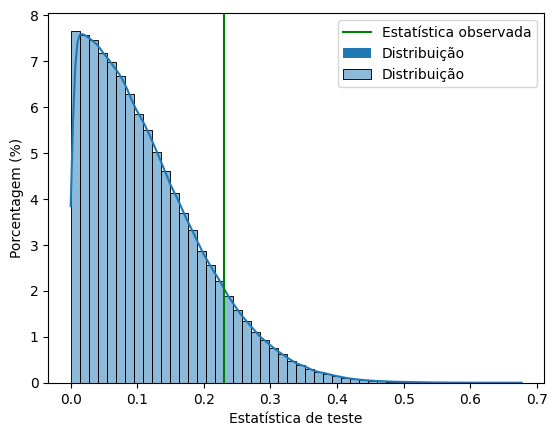

In [8]:
mu = 1.75
sigma = (0.02) ** (1/2)

def simulacao(x):
    matriz_exp = np.ndarray.round(np.random.normal(mu, sigma, x), 4)    
    resultado_singular = np.absolute(matriz_exp - 1.75) 
    return resultado_singular

resultado_total = simulacao(1000000)

eixo = sns.histplot(resultado_total, stat="percent", bins=50, label="Distribuição", kde=True)
eixo.axvline(stat_observada, label="Estatística observada", color="green")
eixo.set_xlabel("Estatística de teste")
eixo.set_ylabel("Porcentagem (%)")
eixo.legend()
eixo.plot()

In [9]:
array = np.array(resultado_total)
logic = array >= stat_observada

fracao = sum(logic) / len(array)

print(f"A fração de simulações tão ruins ou maiores que a estatística observada,"
      f'ou p-valor, foi de {fracao:.5f}\n')

if fracao < significancia: print("Com esta observação, devemos rejeitar H0")
else: print("Com esta observação, NÃO devemos rejeitar H0")

A fração de simulações tão ruins ou maiores que a estatística observada,ou p-valor, foi de 0.10400

Com esta observação, NÃO devemos rejeitar H0


## Referências



Escreva nesta seção as referências consultadas.

1.  O texto utilizado na contextualização do problema foi levemente modificado de um texto gerado pelo chatGPT com o intuito de propor um problema científico interessante.

2. Notebook 9 - Teste de Hipóteses

3. Seaborn - Histplot() : https://seaborn.pydata.org/generated/seaborn.histplot.html

## Playground



Use este espaço para fazer o que quiser. Não será considerado na correção.

